In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv('../../Data/capstone/발전소/한국남부발전(주)_하동변전소 태양광발전실적_20220630.csv', encoding='cp949')

In [73]:
df

,년월일,호기,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,2013-01-01,1,0,0,0,0,0,0.0,0.000,0.000,...,16.872,6.748,2.880,0.100,0.000,0.000,0.0,0,0,0
1,2013-01-02,1,0,0,0,0,0,0.0,0.000,0.000,...,30.360,20.808,7.380,0.220,0.000,0.000,0.0,0,0,0
2,2013-01-03,1,0,0,0,0,0,0.0,0.000,0.000,...,31.004,11.768,3.952,0.204,0.000,0.000,0.0,0,0,0
3,2013-01-04,1,0,0,0,0,0,0.0,0.000,0.000,...,27.704,20.856,8.872,0.188,0.000,0.000,0.0,0,0,0
4,2013-01-05,1,0,0,0,0,0,0.0,0.000,0.000,...,27.184,19.584,9.160,0.216,0.000,0.000,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,2022-06-26,1,0,0,0,0,0,0.0,0.000,1.872,...,17.052,12.696,8.748,5.320,1.092,0.000,0.0,0,0,0
3464,2022-06-27,1,0,0,0,0,0,0.0,0.000,1.212,...,12.216,4.664,4.812,2.016,0.100,0.000,0.0,0,0,0
3465,2022-06-28,1,0,0,0,0,0,0.0,0.264,2.412,...,13.792,13.132,5.340,2.196,0.220,0.336,0.0,0,0,0
3466,2022-06-29,1,0,0,0,0,0,0.0,1.916,3.188,...,11.744,3.956,2.940,1.680,1.144,0.000,0.0,0,0,0


In [74]:
df.drop('호기', axis=1, inplace= True)

In [75]:
y = df.년월일

In [76]:
df.drop('년월일', axis=1, inplace= True)

In [78]:
df = df * 100

In [80]:
df_eda = df.stack().reset_index(level=1)

In [81]:
df_eda.columns = ['hour', 'value']

In [82]:
date = pd.date_range(start='2013-01-01 01:00:00', end='2022-07-01 00:00:00', freq='H')

In [83]:
date

DatetimeIndex(['2013-01-01 01:00:00', '2013-01-01 02:00:00',
               '2013-01-01 03:00:00', '2013-01-01 04:00:00',
               '2013-01-01 05:00:00', '2013-01-01 06:00:00',
               '2013-01-01 07:00:00', '2013-01-01 08:00:00',
               '2013-01-01 09:00:00', '2013-01-01 10:00:00',
               ...
               '2022-06-30 15:00:00', '2022-06-30 16:00:00',
               '2022-06-30 17:00:00', '2022-06-30 18:00:00',
               '2022-06-30 19:00:00', '2022-06-30 20:00:00',
               '2022-06-30 21:00:00', '2022-06-30 22:00:00',
               '2022-06-30 23:00:00', '2022-07-01 00:00:00'],
              dtype='datetime64[ns]', length=83232, freq='H')

In [84]:
len(df_eda)

83232

In [85]:
df_eda['date'] = date

In [86]:
df_eda.value

0       0.0
0       0.0
0       0.0
0       0.0
0       0.0
       ... 
3467    7.6
3467    0.0
3467    0.0
3467    0.0
3467    0.0
Name: value, Length: 83232, dtype: float64

In [92]:
df_eda.set_index('date', inplace=True)

<Axes: xlabel='date'>

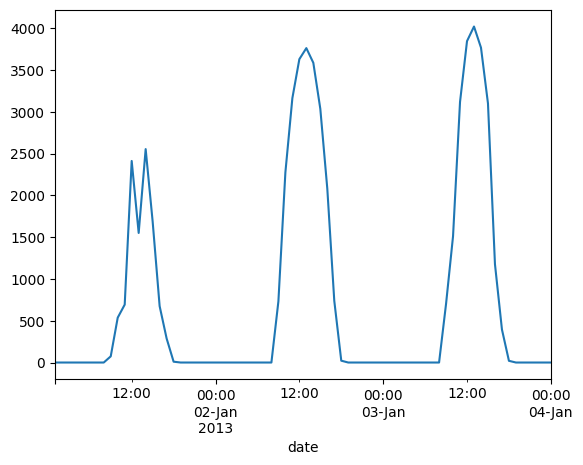

In [98]:
df_eda.value.iloc[:72].plot()

In [102]:
df_eda.reset_index(inplace=True)

In [104]:
df_eda

,date,hour,value
0,2013-01-01 01:00:00,1,0.0
1,2013-01-01 02:00:00,2,0.0
2,2013-01-01 03:00:00,3,0.0
3,2013-01-01 04:00:00,4,0.0
4,2013-01-01 05:00:00,5,0.0
...,...,...,...
83227,2022-06-30 20:00:00,20,7.6
83228,2022-06-30 21:00:00,21,0.0
83229,2022-06-30 22:00:00,22,0.0
83230,2022-06-30 23:00:00,23,0.0


In [105]:
df_eda.to_csv('../../Data/capstone/발전소/하동_eda.csv', index=False)